# Additional exercises to present

# Exercise 1 (optional) - fit a parabola to a datafile

On Moodle, you can find the file ```noisy_dataset.txt```, which contains the x and y data. Fit the function of the type ```ax^2 + b^x + c``` to the dataset using the embedded function ```np.linalg.lstsq``` to calculate the $\chi^2$ values. Plot the results. 


best parameters: a = 2.34666
b = 0.66533
c = -2.42095
Chi^2 = 196620.31823
reduced Chi^2 = 2027.0


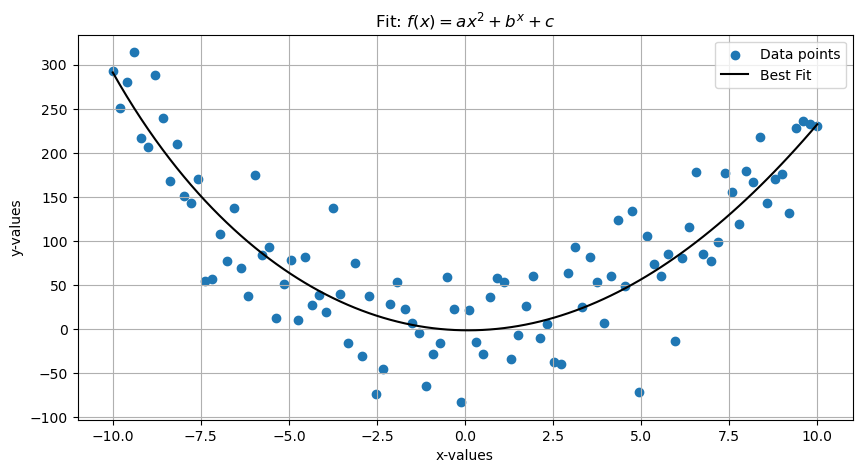

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# We try values for b, and calculate the corresponding a and c values. 
# We compare all models and take the parameterset with the smallest Chi square value. 

data = np.loadtxt("noisy_dataset.txt", delimiter=",") # data in form x, y 
x = data[:, 0]
y = data[:, 1]

# For Chi-squared formula. No sigmas given thats why we assume its 1. 
sigma = np.ones_like(y)

# Grid for b, try every value because nonlinear 
b_values = np.linspace(0.5, 2.0, 500)  # Grid that makes 500 evenly distributed points between 0.5 and 2; because model is nonlinear in b 
# We look for minimum value and start with "worst case" 
best_chi2 = np.inf
best_params = None

# Grid-Search for b 
for b in b_values:
    bx = b ** x

    # Design-Matrix for a and c, because np.lsqs only works with matrix 
    # y - b^x = a x^2 + c for fixed b 
    A = np.column_stack((x**2, np.ones_like(x)))
    y_rel = y - bx

    # Least Squares for a and c 
    params, residuals, rank, s = np.linalg.lstsq(A, y_rel, rcond=None) # rank of matrix =2, s: singularity, res (sum quadratic error)
    a, c = params

    # Model formula 
    y_model = a * x**2 + bx + c

    # Chi-squared formula 
    chi2 = np.sum(((y - y_model) / sigma) ** 2)

    # find best result, if chi-squared is smallest 
    if chi2 < best_chi2:
        best_chi2 = chi2
        best_params = (a, b, c)
        best_y_model = y_model # curve for plot 

# best fit parameters, which have smalles chi-squared 
a_best, b_best, c_best = best_params

chi2_red = best_chi2 / (len(x) - 3)  # 3 = parameters (a, b, c)

print(f"best parameters: a = {a_best:.5f}")
print(f"b = {b_best:.5f}")
print(f"c = {c_best:.5f}")
print(f"Chi^2 = {best_chi2:.5f}")
print(f"reduced Chi^2 = {chi2_red:.5}")

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Data points")
plt.plot(x, best_y_model, label="Best Fit", color = "black")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.title(r"Fit: $f(x) = a x^2 + b^x + c$")
plt.legend()
plt.grid()
plt.show()


Estimated sigma: 170.3908317436103
best parameters: a = 2.34666
b = 0.66533
c = -2.42095
Chi^2 = 6.77230
reduced Chi^2 = 0.069817


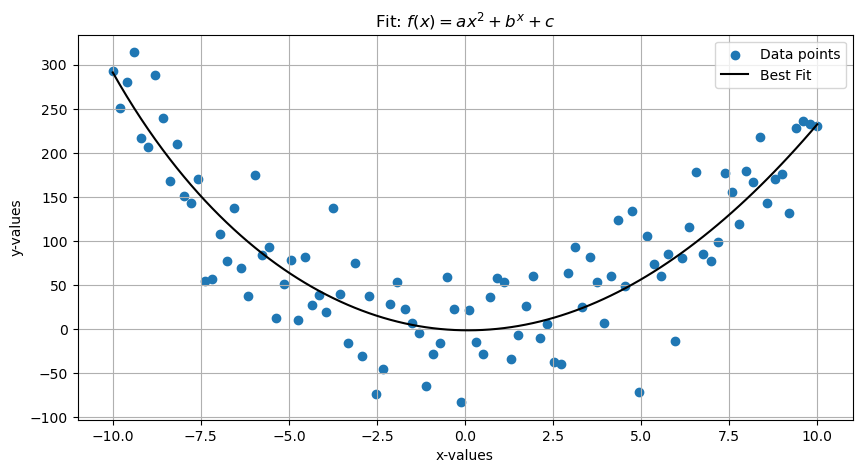

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# We try values for b, and calculate the corresponding a and c values. 
# We compare all models and take the parameterset with the smallest Chi square value. 

data = np.loadtxt("noisy_dataset.txt", delimiter=",") # data in form x, y 
x = data[:, 0]
y = data[:, 1]

# For Chi-squared formula. No sigmas given thats why we assume its 1. 
# First sigma fit = 1 
sigma = np.ones_like(y)

# residuals 
residuals = y - y_model

# estimate sigma, because data suggests, sigma is larger 
sigma_est = np.std(residuals)

# Grid for b, try every value because nonlinear 
b_values = np.linspace(0.5, 2.0, 500)  # Grid that makes 500 evenly distributed points between 0.5 and 2; because model is nonlinear in b 
# We look for minimum value and start with "worst case" 
best_chi2 = np.inf
best_params = None

# Grid-Search for b 
for b in b_values:
    bx = b ** x

    # Design-Matrix for a and c, because np.lsqs only works with matrix 
    # y - b^x = a x^2 + c for fixed b 
    A = np.column_stack((x**2, np.ones_like(x)))
    y_rel = y - bx

    # Least Squares for a and c 
    params, residuals, rank, s = np.linalg.lstsq(A, y_rel, rcond=None) # rank of matrix =2, s: singularity, res (sum quadratic error)
    a, c = params

    # Model formula 
    y_model = a * x**2 + bx + c

    # Chi-squared formula 
    chi2 = np.sum(((y - y_model) / sigma_est) ** 2)

    # find best result, if chi-squared is smallest 
    if chi2 < best_chi2:
        best_chi2 = chi2
        best_params = (a, b, c)
        best_y_model = y_model # curve for plot 
        

# best fit parameters, which have smalles chi-squared 
a_best, b_best, c_best = best_params

chi2_red = best_chi2 / (len(x) - 3)  # 3 = parameters (a, b, c)

print("Estimated sigma:", sigma_est)
print(f"best parameters: a = {a_best:.5f}")
print(f"b = {b_best:.5f}")
print(f"c = {c_best:.5f}")
print(f"Chi^2 = {best_chi2:.5f}")
print(f"reduced Chi^2 = {chi2_red:.5}")

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Data points")
plt.plot(x, best_y_model, label="Best Fit", color = "black")
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.title(r"Fit: $f(x) = a x^2 + b^x + c$")
plt.legend()
plt.grid()
plt.show()

# overestimated error, because reduced chi-squared < 1 

# Exercise 2 (Optional) - Simulating a planet's orbit with leapfrog and forward Euler alrorithms

Imagine that you have a planet orbiting a star. The acceleration of the planet is given by

${\bf a} = \frac{GM}{r^3}{\bf r}$, where $M$ is the mass of the star (you can assume the solar mass), $\bf r$ is the radius-vector, and $G$ is the gravitational constant. You can assume that the planet orbits at 1~au. Write a coupled set of equations for radius and velocity and then: 

**(A)** Simulate 10 years of the planet's motion using the leapfrog algorithm. 

**(B)** Simulate 10 years of the planet's motion using the forward Euler algorithm. 

**(C)** Plot the evolution of the radius, the angular momentum, and the total energy for both algorithms. Discuss your results. Which algorithm is a better fit for this task?